In [19]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

In [33]:
import random
random.seed(1)
base_X = 25
base_Y = -100
ETx = 50*0.000000001
epsilon_amp = 10*0.000000000001
num_clusters = 5
num_nodes = 100
energy = 0.5
packet_bit = 20000

In [21]:
class Cluster:
    def __init__(self):
        nodes = []
        head = None
        
clusters = [Cluster() for i in range(num_clusters)]

In [22]:
def distance(x_1, x_2, y_1, y_2):
    return (x_1 - x_2)**2 + (y_1 - y_2)**2

In [23]:
class Node:
    def __init__(self, x, y):
        self.X = x
        self.Y = y
        self.energy = energy
        self.die = False
    
    def send(self):
        transmission = ETx * packet_bit
        amplification = epsilon_amp * packet_bit * distance(self.X, base_X, self.Y, base_Y)
        if self.energy < transmission + amplification:
            self.die = True
        else:
            self.energy -= (transmission + amplification)

In [24]:
Xs = uniform.rvs(loc=0, scale=50, size=num_nodes)
Ys = uniform.rvs(loc=0, scale=50, size=num_nodes)

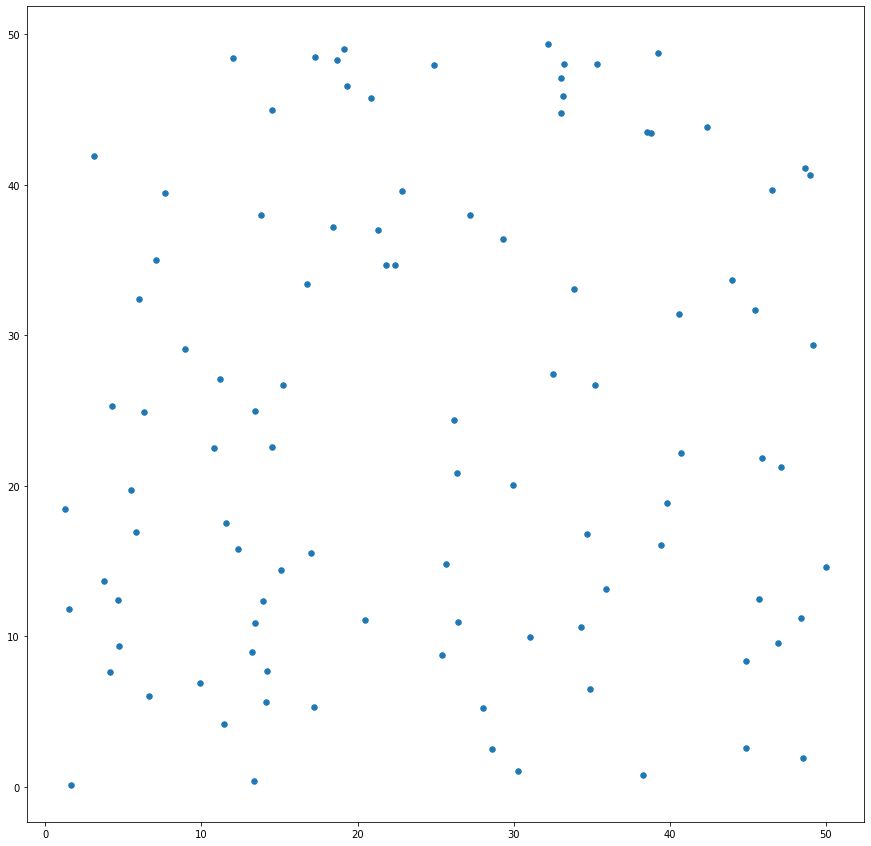

In [25]:
plt.figure(figsize=(15, 15))
plt.scatter(Xs, Ys, s = 30)

In [39]:
Nodes = [None for i in range(num_nodes)]

for i in range(num_nodes):
    Nodes[i] = Node(Xs[i], Ys[i])
num = []
dead = []
for i in range(200):
    num.append(len(dead))
    if i%10 == 0:
        print(i, "number of nodes dead", len(dead))
    print(Nodes[0].energy)
    for j in range(num_nodes):
        if j not in dead:
            Nodes[j].send()
            if Nodes[j].die:
                dead.append(j)

0 number of nodes dead 0
0.5
0.49663337409458175
0.4932667481891635
0.48990012228374524
0.486533496378327
0.48316687047290874
0.4798002445674905
0.47643361866207223
0.473066992756654
0.46970036685123573
10 number of nodes dead 0
0.4663337409458175
0.4629671150403992
0.45960048913498097
0.4562338632295627
0.45286723732414447
0.4495006114187262
0.44613398551330796
0.4427673596078897
0.43940073370247146
0.4360341077970532
20 number of nodes dead 0
0.43266748189163495
0.4293008559862167
0.42593423008079845
0.4225676041753802
0.41920097826996194
0.4158343523645437
0.41246772645912544
0.4091011005537072
0.40573447464828893
0.4023678487428707
30 number of nodes dead 0
0.39900122283745243
0.3956345969320342
0.3922679710266159
0.3889013451211977
0.3855347192157794
0.38216809331036117
0.3788014674049429
0.37543484149952466
0.3720682155941064
0.36870158968868816
40 number of nodes dead 0
0.3653349637832699
0.36196833787785165
0.3586017119724334
0.35523508606701515
0.3518684601615969
0.34850183425

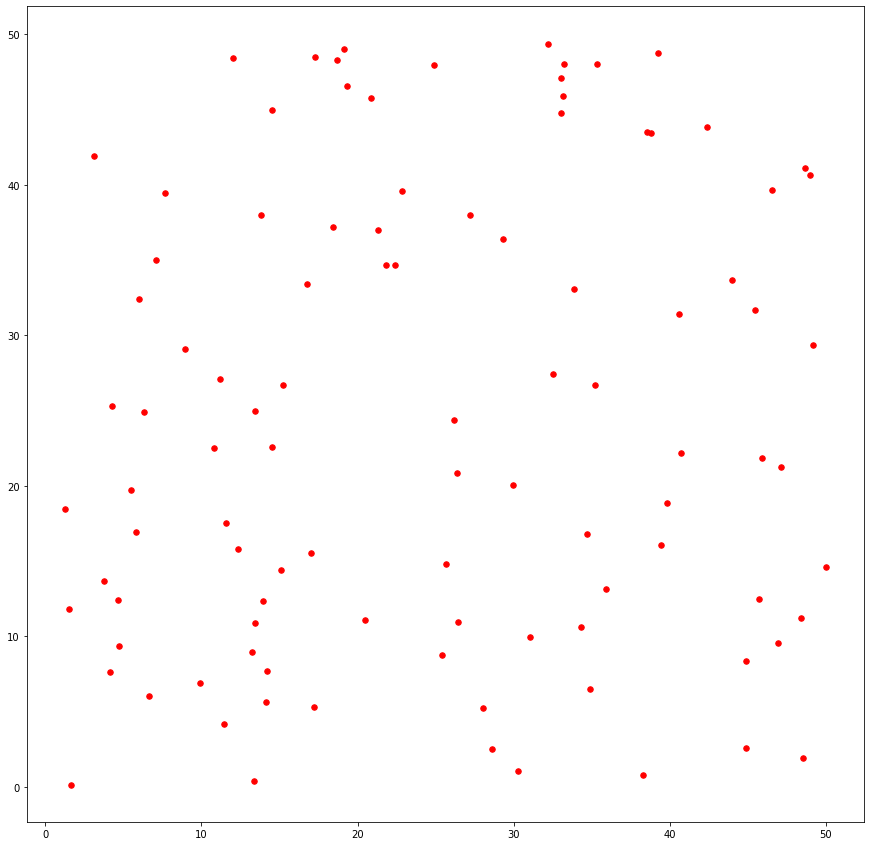

In [30]:
plt.figure(figsize=(15, 15))
dead_X = []
dead_Y = []
undead_X = []
undead_Y = []
for i in range(num_nodes):
    if i in dead:
        dead_X.append(Xs[i])
        dead_Y.append(Ys[i])
    else:
        undead_X.append(Xs[i])
        undead_Y.append(Ys[i])
plt.scatter(dead_X, dead_Y, s = 30, color = 'red')
plt.scatter(undead_X, undead_Y, s = 30, color = 'blue')

In [31]:
print(len(dead))

100


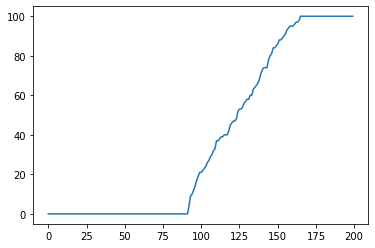

In [40]:
plt.plot(range(200), num)